In [65]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

from src.representation import get_representation, get_representation_from_series
from src.config import mem
from src.utils import get_fps_offset, get_fps_cols

# from rdkit import RDLogger
# RDLogger.DisableLog('rdApp.*')

X_train_1 = pd.read_pickle('../data/processed/X_train_1.pkl.zip')
y_train_1 = pd.read_pickle('../data/processed/y_train_1.pkl')

In [67]:
# get fingerprints offset
FPS_OFFSET = get_fps_offset(X_train_1.columns)
FPS_OFFSET

2343

# Correlations

In [68]:
corr = mem.cache(lambda x: x.corr())(X_train_1.iloc[:, FPS_OFFSET:])

In [69]:
# na correlated columns
mask = corr.iloc[0,:].isna()
na_corr_cols = corr.columns[mask]
na_corr_cols

Index([], dtype='object')

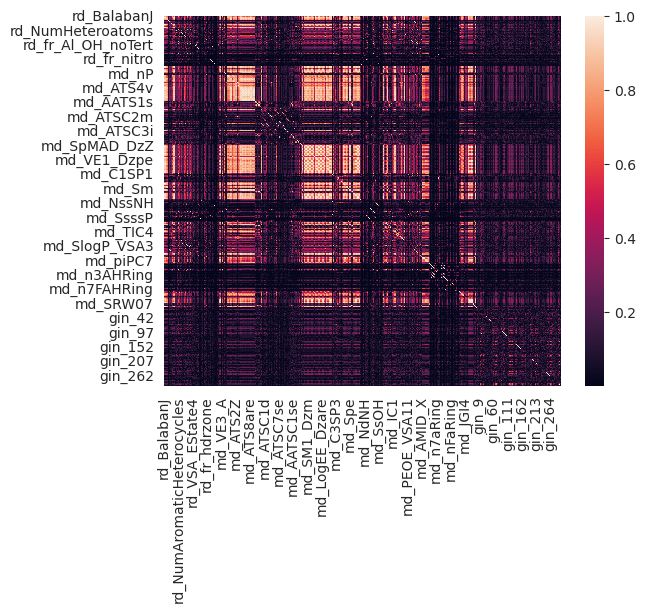

In [70]:
sns.heatmap(corr.abs());

In [71]:
corr.columns

Index(['rd_BalabanJ', 'rd_BertzCT', 'rd_Chi0', 'rd_Chi0n', 'rd_Chi0v',
       'rd_Chi1', 'rd_Chi1n', 'rd_Chi1v', 'rd_Chi2n', 'rd_Chi2v',
       ...
       'gin_290', 'gin_291', 'gin_292', 'gin_293', 'gin_294', 'gin_295',
       'gin_296', 'gin_297', 'gin_298', 'gin_299'],
      dtype='object', length=1413)

In [72]:
descs_target = pd.concat([X_train_1.iloc[:, FPS_OFFSET:], y_train_1], axis=1)
corr = mem.cache(lambda x: x.corr())(descs_target)

In [73]:
from src.corr import noncorrelated_features

ids = noncorrelated_features(corr, threshold=0.95)

In [74]:
uncorr_cols = corr.columns[ids]
uncorr_cols

Index(['rd_BalabanJ', 'rd_EState_VSA1', 'rd_EState_VSA10', 'rd_EState_VSA11',
       'rd_EState_VSA5', 'rd_EState_VSA7', 'rd_FpDensityMorgan1',
       'rd_FpDensityMorgan2', 'rd_FpDensityMorgan3', 'rd_HallKierAlpha',
       ...
       'gin_290', 'gin_291', 'gin_292', 'gin_293', 'gin_294', 'gin_295',
       'gin_296', 'gin_297', 'gin_298', 'gin_299'],
      dtype='object', length=837)

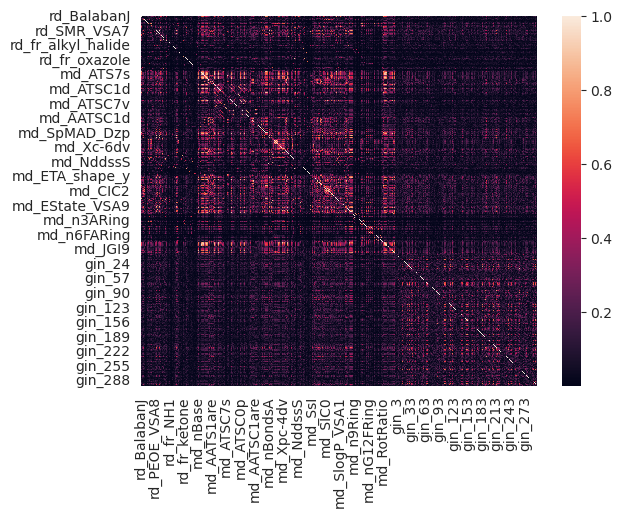

In [75]:
sns.heatmap(corr.iloc[ids, ids].abs());

In [76]:
fps_cols = get_fps_cols(X_train_1.columns)    
text_cols = [c for c in X_train_1.columns if c not in fps_cols]

In [77]:
text_cols

['rd_BalabanJ',
 'rd_BertzCT',
 'rd_Chi0',
 'rd_Chi0n',
 'rd_Chi0v',
 'rd_Chi1',
 'rd_Chi1n',
 'rd_Chi1v',
 'rd_Chi2n',
 'rd_Chi2v',
 'rd_Chi3n',
 'rd_Chi3v',
 'rd_Chi4n',
 'rd_Chi4v',
 'rd_EState_VSA1',
 'rd_EState_VSA10',
 'rd_EState_VSA11',
 'rd_EState_VSA2',
 'rd_EState_VSA3',
 'rd_EState_VSA4',
 'rd_EState_VSA5',
 'rd_EState_VSA6',
 'rd_EState_VSA7',
 'rd_EState_VSA8',
 'rd_EState_VSA9',
 'rd_ExactMolWt',
 'rd_FpDensityMorgan1',
 'rd_FpDensityMorgan2',
 'rd_FpDensityMorgan3',
 'rd_FractionCSP3',
 'rd_HallKierAlpha',
 'rd_HeavyAtomCount',
 'rd_HeavyAtomMolWt',
 'rd_Ipc',
 'rd_Kappa1',
 'rd_Kappa2',
 'rd_Kappa3',
 'rd_LabuteASA',
 'rd_MaxAbsEStateIndex',
 'rd_MaxEStateIndex',
 'rd_MinAbsEStateIndex',
 'rd_MinEStateIndex',
 'rd_MolLogP',
 'rd_MolMR',
 'rd_MolWt',
 'rd_NHOHCount',
 'rd_NOCount',
 'rd_NumAliphaticCarbocycles',
 'rd_NumAliphaticHeterocycles',
 'rd_NumAliphaticRings',
 'rd_NumAromaticCarbocycles',
 'rd_NumAromaticHeterocycles',
 'rd_NumAromaticRings',
 'rd_NumHAcceptors'

In [78]:
corr.iloc[ids, -1].abs().sort_values(ascending=False)

md_SlogP_VSA8    0.285909
md_NaaaC         0.264743
md_AATS1dv       0.254697
md_SaaaC         0.253333
md_SMR_VSA5      0.246137
                   ...   
md_ATSC0dv       0.000682
md_ETA_dPsi_B    0.000635
md_ATSC8dv       0.000525
gin_70           0.000112
md_Xch-6dv       0.000093
Name: target, Length: 837, dtype: float64

In [79]:
X_train_2 = pd.read_pickle('../data/processed/X_train_2.pkl.zip')
y_train_2 = pd.read_pickle('../data/processed/y_train_2.pkl')

X_train_3 = pd.read_pickle('../data/processed/X_train_3.pkl.zip')
y_train_3 = pd.read_pickle('../data/processed/y_train_3.pkl')

In [80]:
def drop_correlated_features(X_train, y_train, threshold=0.95, drop_fps=False):    
    FPS_OFFSET = get_fps_offset(X_train.columns)
    descs_target = pd.concat([X_train.iloc[:, FPS_OFFSET:], y_train], axis=1)
    corr = mem.cache(lambda x: x.corr())(descs_target)
    ids = noncorrelated_features(corr, threshold)
    uncorr_cols = corr.columns[ids]

    if drop_fps:
        return X_train_1[uncorr_cols].copy()

    fps_cols = get_fps_cols(X_train.columns)
    text_cols = [c for c in uncorr_cols if c not in fps_cols]
    # md_cols = [c for c in uncorr_cols if 'md_' in c]
    # rd_cols = [c for c in uncorr_cols if 'rd_' in c]
    
    return X_train[fps_cols + text_cols].copy()

In [81]:
X_train_1.shape

(5094, 3756)

In [82]:
X_train_1 = drop_correlated_features(X_train_1, y_train_1)
X_train_1.shape

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3699562224.drop_correlated_features.<locals>.<lambda>...
<lambda>(      rd_BalabanJ   rd_BertzCT    rd_Chi0   rd_Chi0n   rd_Chi0v    rd_Chi1  \
id                                                                           
0        2.126255  1081.625979  15.551677  12.633589  12.633589  11.254020   
1        1.489526  3545.358079  33.739029  25.687094  25.687094  24.346244   
2        3.620019   206.527957   8.690234   5.572731   5.572731   5.201907   
3        3.037024   272.982179   7.560478   4.735488   4.735488   4.736382   
4        2.696947   463.594954  14.250712  10.690393  10.690393   9.116922   
...           ...          ...        ...        ...        ...        ...   
5089     1.473146   634.274837  21.681434  20.921541  20.921541  14.202380  ...)
________________________________________________________<lambda> - 14.5s, 0.2min


(5094, 3180)

In [83]:
X_train_1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'gin_290', 'gin_291', 'gin_292', 'gin_293', 'gin_294', 'gin_295',
       'gin_296', 'gin_297', 'gin_298', 'gin_299'],
      dtype='object', length=3180)

In [84]:
X_train_2.shape, y_train_2.shape

((1424, 4112), (1424,))

In [85]:
X_train_2 = drop_correlated_features(X_train_2, y_train_2)
X_train_2.shape

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3699562224.drop_correlated_features.<locals>.<lambda>...
<lambda>(      rd_BalabanJ   rd_BertzCT    rd_Chi0   rd_Chi0n   rd_Chi0v    rd_Chi1  \
id                                                                           
5094     2.208317   751.859944  15.405413  11.881172  12.697668  10.045244   
5095     1.683975   921.221996  18.518297  13.784460  14.540389  12.562882   
5096     1.940781  1329.838033  19.957455  16.467174  16.467174  14.164704   
5097     1.934491  1138.549641  21.233840  15.530293  17.163286  13.609027   
5098     1.905459  1031.487580  18.802754  14.892675  15.709171  13.207040   
...           ...          ...        ...        ...        ...        ...   
6513     1.476367   940.705760  20.053831  16.635696  16.635696  14.224678  ...)
_________________________________________________________<lambda> - 6.5s, 0.1min


(1424, 3358)

In [86]:
X_train_3 = drop_correlated_features(X_train_3, y_train_3)
X_train_3.shape

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3699562224.drop_correlated_features.<locals>.<lambda>...
<lambda>(      rd_BalabanJ   rd_BertzCT    rd_Chi0   rd_Chi0n   rd_Chi0v    rd_Chi1  \
id                                                                           
6518     2.458834   462.905084  17.294682  14.278788  15.790646  10.852685   
6519     2.004089   963.288148  18.585057  14.659148  14.659148  12.379918   
6520     1.597975  1036.601989  21.085057  15.802299  17.374724  13.630735   
6521     1.314989  1562.591959  31.706013  23.367894  25.000888  21.010147   
6522     1.565347  1236.676820  27.731322  21.638752  21.638752  17.828164   
...           ...          ...        ...        ...        ...        ...   
7934     3.088864   748.744306  12.740122   7.913486   9.425344   7.913591  ...)
_________________________________________________________<lambda> - 4.6s, 0.1min


(1421, 3192)

In [87]:
# X_train_1.to_csv('../data/processed/X_train_1.csv.zip')
# X_train_2.to_csv('../data/processed/X_train_2.csv.zip')
# X_train_3.to_csv('../data/processed/X_train_3.csv.zip')

X_train_1.to_pickle('../data/processed/X_train_1.pkl.zip')
X_train_2.to_pickle('../data/processed/X_train_2.pkl.zip')
X_train_3.to_pickle('../data/processed/X_train_3.pkl.zip')

In [88]:
X_test_1 = pd.read_pickle('../data/processed/X_test_1.pkl.zip')
X_test_2 = pd.read_pickle('../data/processed/X_test_2.pkl.zip')
X_test_3 = pd.read_pickle('../data/processed/X_test_3.pkl.zip')

X_test_1 = X_test_1[X_train_1.columns]
X_test_2 = X_test_2[X_train_2.columns]
X_test_3 = X_test_3[X_train_3.columns]

X_test_1.to_pickle('../data/processed/X_test_1.pkl.zip')
X_test_2.to_pickle('../data/processed/X_test_2.pkl.zip')
X_test_3.to_pickle('../data/processed/X_test_3.pkl.zip')